In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_statistic as ART_sta

import warnings
warnings.filterwarnings('ignore')

In [2]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [  ]
Fi = 1 - 1/np.array(Tr)

In [3]:
COMPUTERNAME = os.environ['COMPUTERNAME']
print(f'Computer: {COMPUTERNAME}')

if COMPUTERNAME == 'BR_DELL':
    dir_font = os.path.join('/','run')
else:
    dir_font = os.path.join('/')

Computer: UNIPD_DELL


In [4]:
veneto_dir = os.path.join(dir_font,'media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [5]:
obs_base = os.path.join(dir_font,'media','arturo','T9','Data','Italy','Rain_Gauges_QC')
dir_base = os.path.join(dir_font,'media','arturo','T9','Data','Italy')

In [6]:
METADATA = pd.read_csv(os.path.join(obs_base, 'data', 'METADATA', 'METADATA_FTS_QCv4_Case1_wAIRHO_v3_1dy.csv'))
ISO_names = np.unique(METADATA.ISO.values)

In [7]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

In [8]:
dir_ =os.path.join(dir_font,'media','arturo','T9','Data','Italy')

DF_IMERG = ART_sta.get_relative_error('IMERG',dir_,corrected=True)
DF_CMORPH = ART_sta.get_relative_error('CMORPH',dir_,corrected=True)
DF_MSWEP = ART_sta.get_relative_error('MSWEP',dir_,corrected=True)
DF_ERA5 = ART_sta.get_relative_error('ERA5',dir_,corrected=True)
DF_GSMaP = ART_sta.get_relative_error('GSMaP',dir_,corrected=True)
DF_CHIRPS = ART_sta.get_relative_error('CHIRPS',dir_,corrected=True)

DF_ENSEMBLE_MEAN = ART_sta.get_relative_error('ENSEMBLE_ALL_mean',dir_,corrected=True)
DF_ENSEMBLE_MEDIAN = ART_sta.get_relative_error('ENSEMBLE_ALL_median',dir_,corrected=True)

Loading IMERG corrected statistics...
Loading CMORPH corrected statistics...
Loading MSWEP corrected statistics...
Loading ERA5 corrected statistics...
Loading GSMaP corrected statistics...
Loading CHIRPS corrected statistics...
Loading ENSEMBLE_ALL_mean corrected statistics...
Loading ENSEMBLE_ALL_median corrected statistics...


In [9]:
len(DF_IMERG), len(DF_CMORPH), len(DF_MSWEP), len(DF_ERA5), len(DF_GSMaP), len(DF_CHIRPS), len(DF_ENSEMBLE_MEAN)

(819, 819, 819, 819, 819, 819, 819)

## Relative Error Distribution and Taylor

In [10]:
RSR_RAW_compare, RSR_DOWN_compare = ART_sta.Statistics_RAW_DOWN(DF_IMERG, DF_CMORPH, DF_MSWEP, DF_ERA5, DF_GSMaP, DF_CHIRPS, DF_ENSEMBLE_MEAN, DF_ENSEMBLE_MEDIAN)

In [11]:
RSR_RAW_compare

Dataset   STD   Mean  Median   DIFF   IQR  CORR  MARE
0            IMERG  0.30  0.051   0.043  0.008  0.39  0.57  0.25
1           CMORPH  0.32  0.006   0.008  0.002  0.43  0.45  0.26
2            MSWEP  0.35  0.186   0.176  0.010  0.45  0.56  0.34
3             ERA5  0.31  0.153   0.143  0.010  0.42  0.57  0.29
4            GSMaP  0.30  0.007   0.013  0.006  0.38  0.49  0.24
5           CHIRPS  0.28 -0.140  -0.150  0.010  0.35  0.43  0.25
6    ENSEMBLE MEAN  0.25 -0.045  -0.032  0.013  0.33  0.65  0.20
7  ENSEMBLE MEDIAN  0.25 -0.023  -0.011  0.012  0.33  0.67  0.20

In [12]:
RSR_DOWN_compare

Dataset   STD   Mean  Median   DIFF   IQR  CORR  MARE
0            IMERG  0.30  0.030   0.021  0.009  0.39  0.56  0.25
1           CMORPH  0.31 -0.013  -0.011  0.002  0.44  0.44  0.26
2            MSWEP  0.35  0.178   0.158  0.020  0.44  0.53  0.34
3             ERA5  0.29  0.123   0.116  0.007  0.39  0.59  0.26
4            GSMaP  0.29 -0.013  -0.006  0.007  0.37  0.49  0.24
5           CHIRPS  0.28 -0.144  -0.160  0.016  0.34  0.42  0.25
6    ENSEMBLE MEAN  0.24 -0.056  -0.041  0.015  0.32  0.65  0.20
7  ENSEMBLE MEDIAN  0.25 -0.031  -0.017  0.014  0.33  0.67  0.20

../figures/Article_down/Products_DOWN_RE_dist_taylor_corrected.png


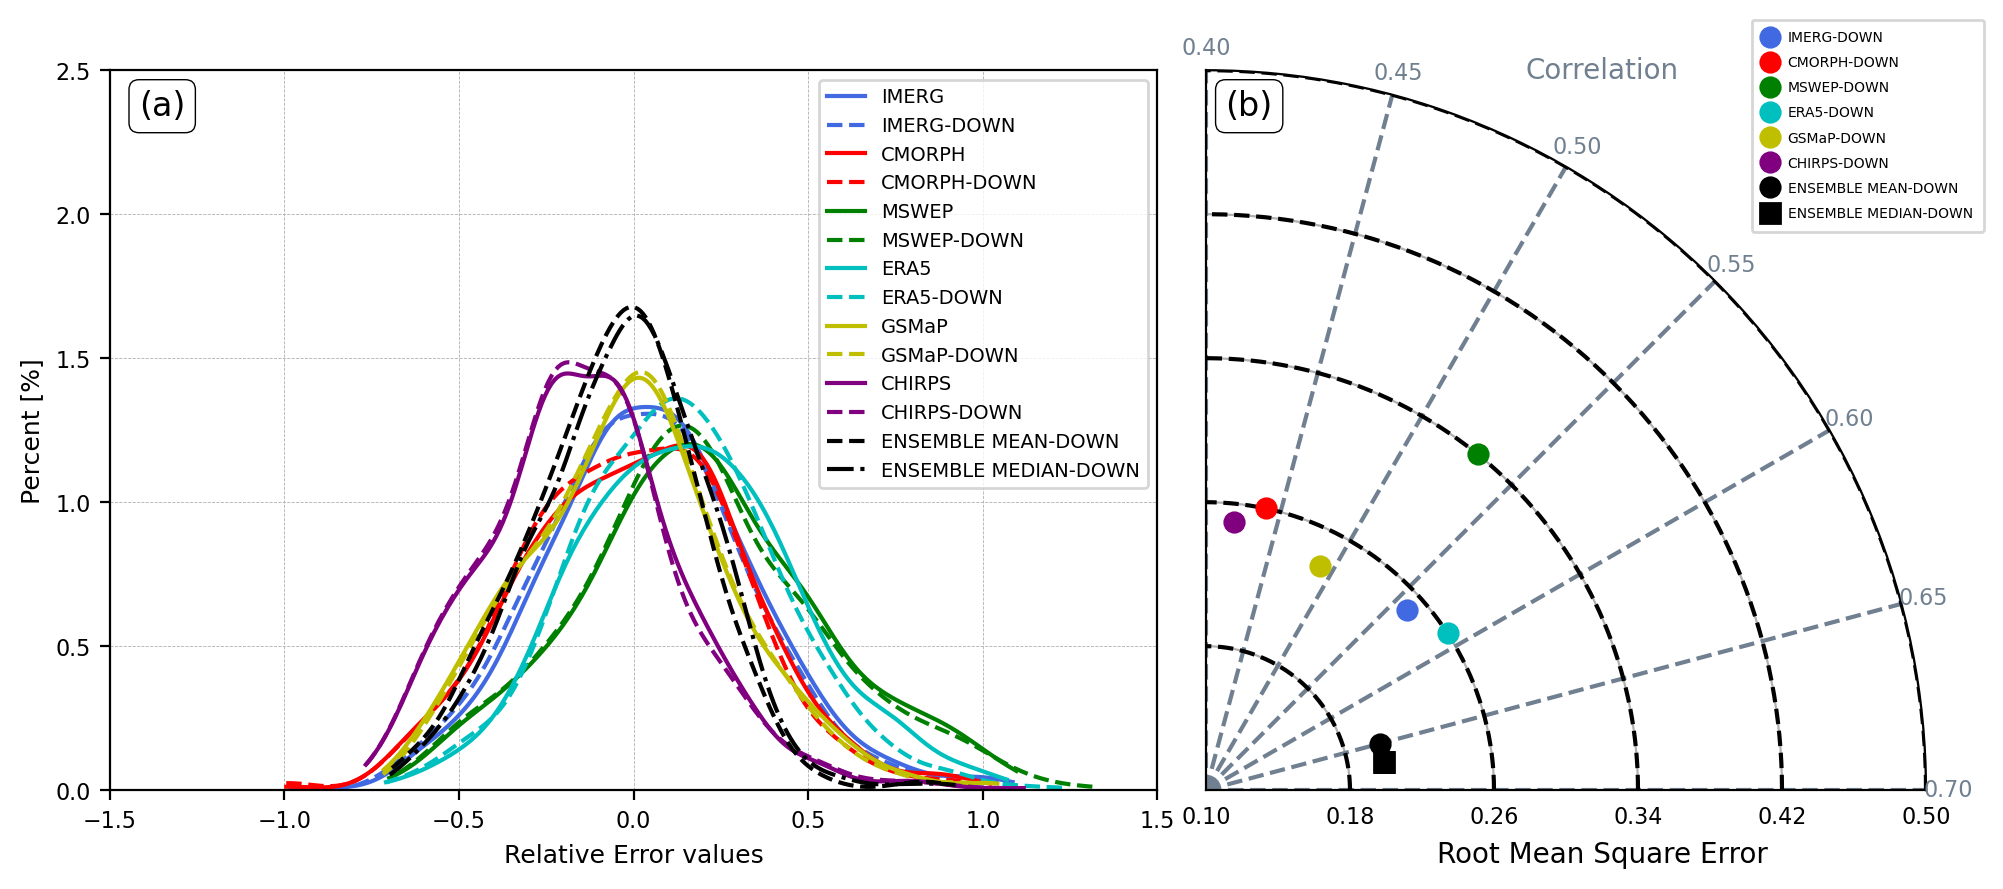

In [17]:
fig = plt.figure(figsize=(11,4),dpi=200)
gs = gridspec.GridSpec(1,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(DF_IMERG.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG.RER)), np.nanmax(np.array(DF_IMERG.RER))))
sns.kdeplot(DF_IMERG.RED,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG-DOWN',
            clip=(np.nanmin(np.array(DF_IMERG.RED)), np.nanmax(np.array(DF_IMERG.RED))))

sns.kdeplot(DF_CMORPH.RER,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH',
            clip=(np.nanmin(np.array(DF_CMORPH.RER)), np.nanmax(np.array(DF_CMORPH.RER))))
sns.kdeplot(DF_CMORPH.RED,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH-DOWN',
            clip=(np.nanmin(np.array(DF_CMORPH.RED)), np.nanmax(np.array(DF_CMORPH.RED))))

sns.kdeplot(DF_MSWEP.RER,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP',
            clip=(np.nanmin(np.array(DF_MSWEP.RER)), np.nanmax(np.array(DF_MSWEP.RER))))
sns.kdeplot(DF_MSWEP.RED,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP-DOWN',
            clip=(np.nanmin(np.array(DF_MSWEP.RED)), np.nanmax(np.array(DF_MSWEP.RED))))

sns.kdeplot(DF_ERA5.RER,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5',
            clip=(np.nanmin(np.array(DF_ERA5.RER)), np.nanmax(np.array(DF_ERA5.RER))))
sns.kdeplot(DF_ERA5.RED,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5-DOWN',
            clip=(np.nanmin(np.array(DF_ERA5.RED)), np.nanmax(np.array(DF_ERA5.RED))))

sns.kdeplot(DF_GSMaP.RER,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP',
            clip=(np.nanmin(np.array(DF_GSMaP.RER)), np.nanmax(np.array(DF_GSMaP.RER))))
sns.kdeplot(DF_GSMaP.RED+0.02,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN',
            clip=(np.nanmin(np.array(DF_GSMaP.RED)), np.nanmax(np.array(DF_GSMaP.RED))))

sns.kdeplot(DF_CHIRPS.RER,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS',
            clip=(np.nanmin(np.array(DF_CHIRPS.RER)), np.nanmax(np.array(DF_CHIRPS.RER))))
sns.kdeplot(DF_CHIRPS.RED,color=colors[5], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS-DOWN',
            clip=(np.nanmin(np.array(DF_CHIRPS.RED)), np.nanmax(np.array(DF_CHIRPS.RED))))

sns.kdeplot(DF_ENSEMBLE_MEAN.RED,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE MEAN-DOWN',
            clip=(np.nanmin(np.array(DF_ENSEMBLE_MEAN.RED)), np.nanmax(np.array(DF_ENSEMBLE_MEAN.RED))))

sns.kdeplot(DF_ENSEMBLE_MEDIAN.RED,color='k', linestyle='-.',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE MEDIAN-DOWN',
            clip=(np.nanmin(np.array(DF_ENSEMBLE_MEDIAN.RED)), np.nanmax(np.array(DF_ENSEMBLE_MEDIAN.RED))))

ax1.set_ylabel('Percent [%]',fontsize=9)
ax1.set_xlabel('Relative Error values',fontsize=9)
ax1.legend(fontsize=7, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.tick_params(axis='both', which='major', labelsize=8)

ax1.text(0.05, 0.95, '(a)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 1], polar=True)

rmin = 0.1
rmax = 0.5

c_min = 0.4
c_max = 0.7

correlations = np.arange(c_min, c_max+0.05, 0.05)

for c in correlations:
    theta = (c_max - c) / (c_max - c_min) * (np.pi/2)
    ax1.plot([theta, theta], [rmin, rmax], color="slategrey", linestyle="--")
    ax1.text(theta, rmax * 1.025, f"{c:.2f}", ha="center", va="center",
            fontsize=8, color="slategrey")

# --- NUEVOS CÍRCULOS RADIALES DE MARE ---
radial_ticks = np.linspace(rmin, rmax, 6)
for r in radial_ticks:
    ax1.plot(np.linspace(0, np.pi/2, 200), np.ones(200)*r, color="k", linestyle="--")

# --- LIMPIEZA DE EJE ANGULAR ---
ax1.xaxis.set_visible(False)

# --- PUNTOS DE MODELOS ---
for rmse_val, corr_val, lab, co in zip(RSR_DOWN_compare.MARE.values, RSR_DOWN_compare.CORR.values, RSR_DOWN_compare.Dataset.values, colors):
    theta = (c_max - corr_val) / (c_max - c_min) * (np.pi/2)
    if lab == 'ENSEMBLE MEAN':
        ax1.plot(theta, rmse_val, 'o', markersize=7, label=f'{lab}-DOWN', color='k')
    elif lab == 'ENSEMBLE MEDIAN':
        ax1.plot(theta, rmse_val, 's', markersize=7, label=f'{lab}-DOWN', color='k')
    else:
        ax1.plot(theta, rmse_val, 'o', markersize=7, label=f'{lab}-DOWN', color=co)

# --- LÍMITES Y DIRECCIÓN ---
ax1.set_thetamin(0)
ax1.set_thetamax(90)
ax1.set_theta_zero_location("E")
ax1.set_theta_direction(1)
ax1.set_rmin(rmin)
ax1.set_rmax(rmax)

# --- RADIAL TICKS ---
ax1.set_yticks(radial_ticks)
ax1.tick_params(axis='both', which='major', labelsize=8, pad=2)
ax1.grid(True)

# plt.legend(fontsize=5, ncol=1, loc='upper right', bbox_to_anchor=(1.09, 1.08))
plt.legend(fontsize=5, 
            ncol=1, 
            loc='upper right', 
            bbox_to_anchor=(1.09, 1.08),
            handlelength=1.0,      # Longitud de la línea del símbolo
            handletextpad=0.8,     # Espacio entre símbolo y texto
            borderpad=0.8,         # Padding interno
            labelspacing=0.8)      # Espacio entre etiquetas

# --- LABELS ---
ax1.text(0.55, -0.09, "Root Mean Square Error", transform=ax1.transAxes,
        ha="center", va="center", fontsize=10)

ax1.text(0.55, 1.0, "Correlation", transform=ax1.transAxes,
        ha="center", va="center", rotation=0, fontsize=10, color='slategrey')

ax1.text(0.06, 0.95, '(b)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=-0.11, hspace=-0.2)

salida = '../figures/Article_down/Products_DOWN_RE_dist_taylor_corrected.png'
print(salida)
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Elevation Analysis

In [17]:
QUARTILE_IMERG, QUARTILE_IMERG_M = ART_sta.DF_elevation(DF_IMERG)
QUARTILE_CMORPH, QUARTILE_CMORPH_M = ART_sta.DF_elevation(DF_CMORPH)
QUARTILE_MSWEP, QUARTILE_MSWEP_M = ART_sta.DF_elevation(DF_MSWEP)
QUARTILE_ERA5, QUARTILE_ERA5_M = ART_sta.DF_elevation(DF_ERA5)
QUARTILE_GSMaP, QUARTILE_GSMaP_M = ART_sta.DF_elevation(DF_GSMaP)
QUARTILE_CHIRPS, QUARTILE_CHIRPS_M = ART_sta.DF_elevation(DF_CHIRPS)

QUARTILE_ENSEMBLE_MEAN, QUARTILE_ENSEMBLE_MEAN = ART_sta.DF_elevation(DF_ENSEMBLE_MEAN)
QUARTILE_ENSEMBLE_MEDIAN, QUARTILE_ENSEMBLE_MEDIAN = ART_sta.DF_elevation(DF_ENSEMBLE_MEDIAN)

In [18]:
elev_cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,color='k')
# REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)
ITALY.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.3, zorder=21, alpha=0.5)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=2, alpha=0.5)

group_codes = DF_IMERG['ELEV_QUARTILE'].cat.codes

a1 = ax1.scatter(
    DF_IMERG['LON'],
    DF_IMERG['LAT'],
    c=DF_IMERG['ELEV_color'],
    s=DF_IMERG['ELEV_QUARTILEn'],
    alpha=0.7,
    zorder=20,
    edgecolor='k',
    linewidth=0.2
)

group_colors = {
    '≤25%':  '#abd9e9',
    '25–50%': '#2c7bb6',
    '50–75%': '#fdae61',
    '>75%':   '#d7191c'
}

legend_elements = [
    mpatches.Patch(color=color, label=label)
    for label, color in group_colors.items()
]

ax1.legend(
    handles=legend_elements,
    title='Elevation quantiles',
    loc='upper right',
    fontsize=5,
    title_fontsize=6,
    frameon=True
)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}


## Scatter plot

In [19]:
corr_IMERG = RSR_DOWN_compare.CORR[0]
corr_CMORPH = RSR_DOWN_compare.CORR[1]
corr_MSWEP = RSR_DOWN_compare.CORR[2]
corr_ERA5 = RSR_DOWN_compare.CORR[3]
corr_GSMaP = RSR_DOWN_compare.CORR[4]
corr_CHIRPS = RSR_DOWN_compare.CORR[5]
corr_ENSEMBLE_MEAN = RSR_DOWN_compare.CORR[6]
corr_ENSEMBLE_MEDIAN = RSR_DOWN_compare.CORR[7]

In [20]:
IMERG_x, IMERG_y, IMERG_slope = ART_sta.linear_regression(DF_IMERG)
CMORPH_x, CMORPH_y, CMORPH_slope = ART_sta.linear_regression(DF_CMORPH)
MSWEP_x, MSWEP_y, MSWEP_slope = ART_sta.linear_regression(DF_MSWEP)
ERA5_x, ERA5_y, ERA5_slope = ART_sta.linear_regression(DF_ERA5)
GSMaP_x, GSMaP_y, GSMaP_slope = ART_sta.linear_regression(DF_GSMaP)
CHIRPS_x, CHIRPS_y, CHIRPS_slope = ART_sta.linear_regression(DF_CHIRPS)
ENSEMBLE_MEAN_x, ENSEMBLE_MEAN_y, ENSEMBLE_MEAN_slope = ART_sta.linear_regression(DF_ENSEMBLE_MEAN)
ENSEMBLE_MEDIAN_x, ENSEMBLE_MEDIAN_y, ENSEMBLE_MEDIAN_slope = ART_sta.linear_regression(DF_ENSEMBLE_MEDIAN)

../figures/Article_down/Scatter_ALL_corrected.png


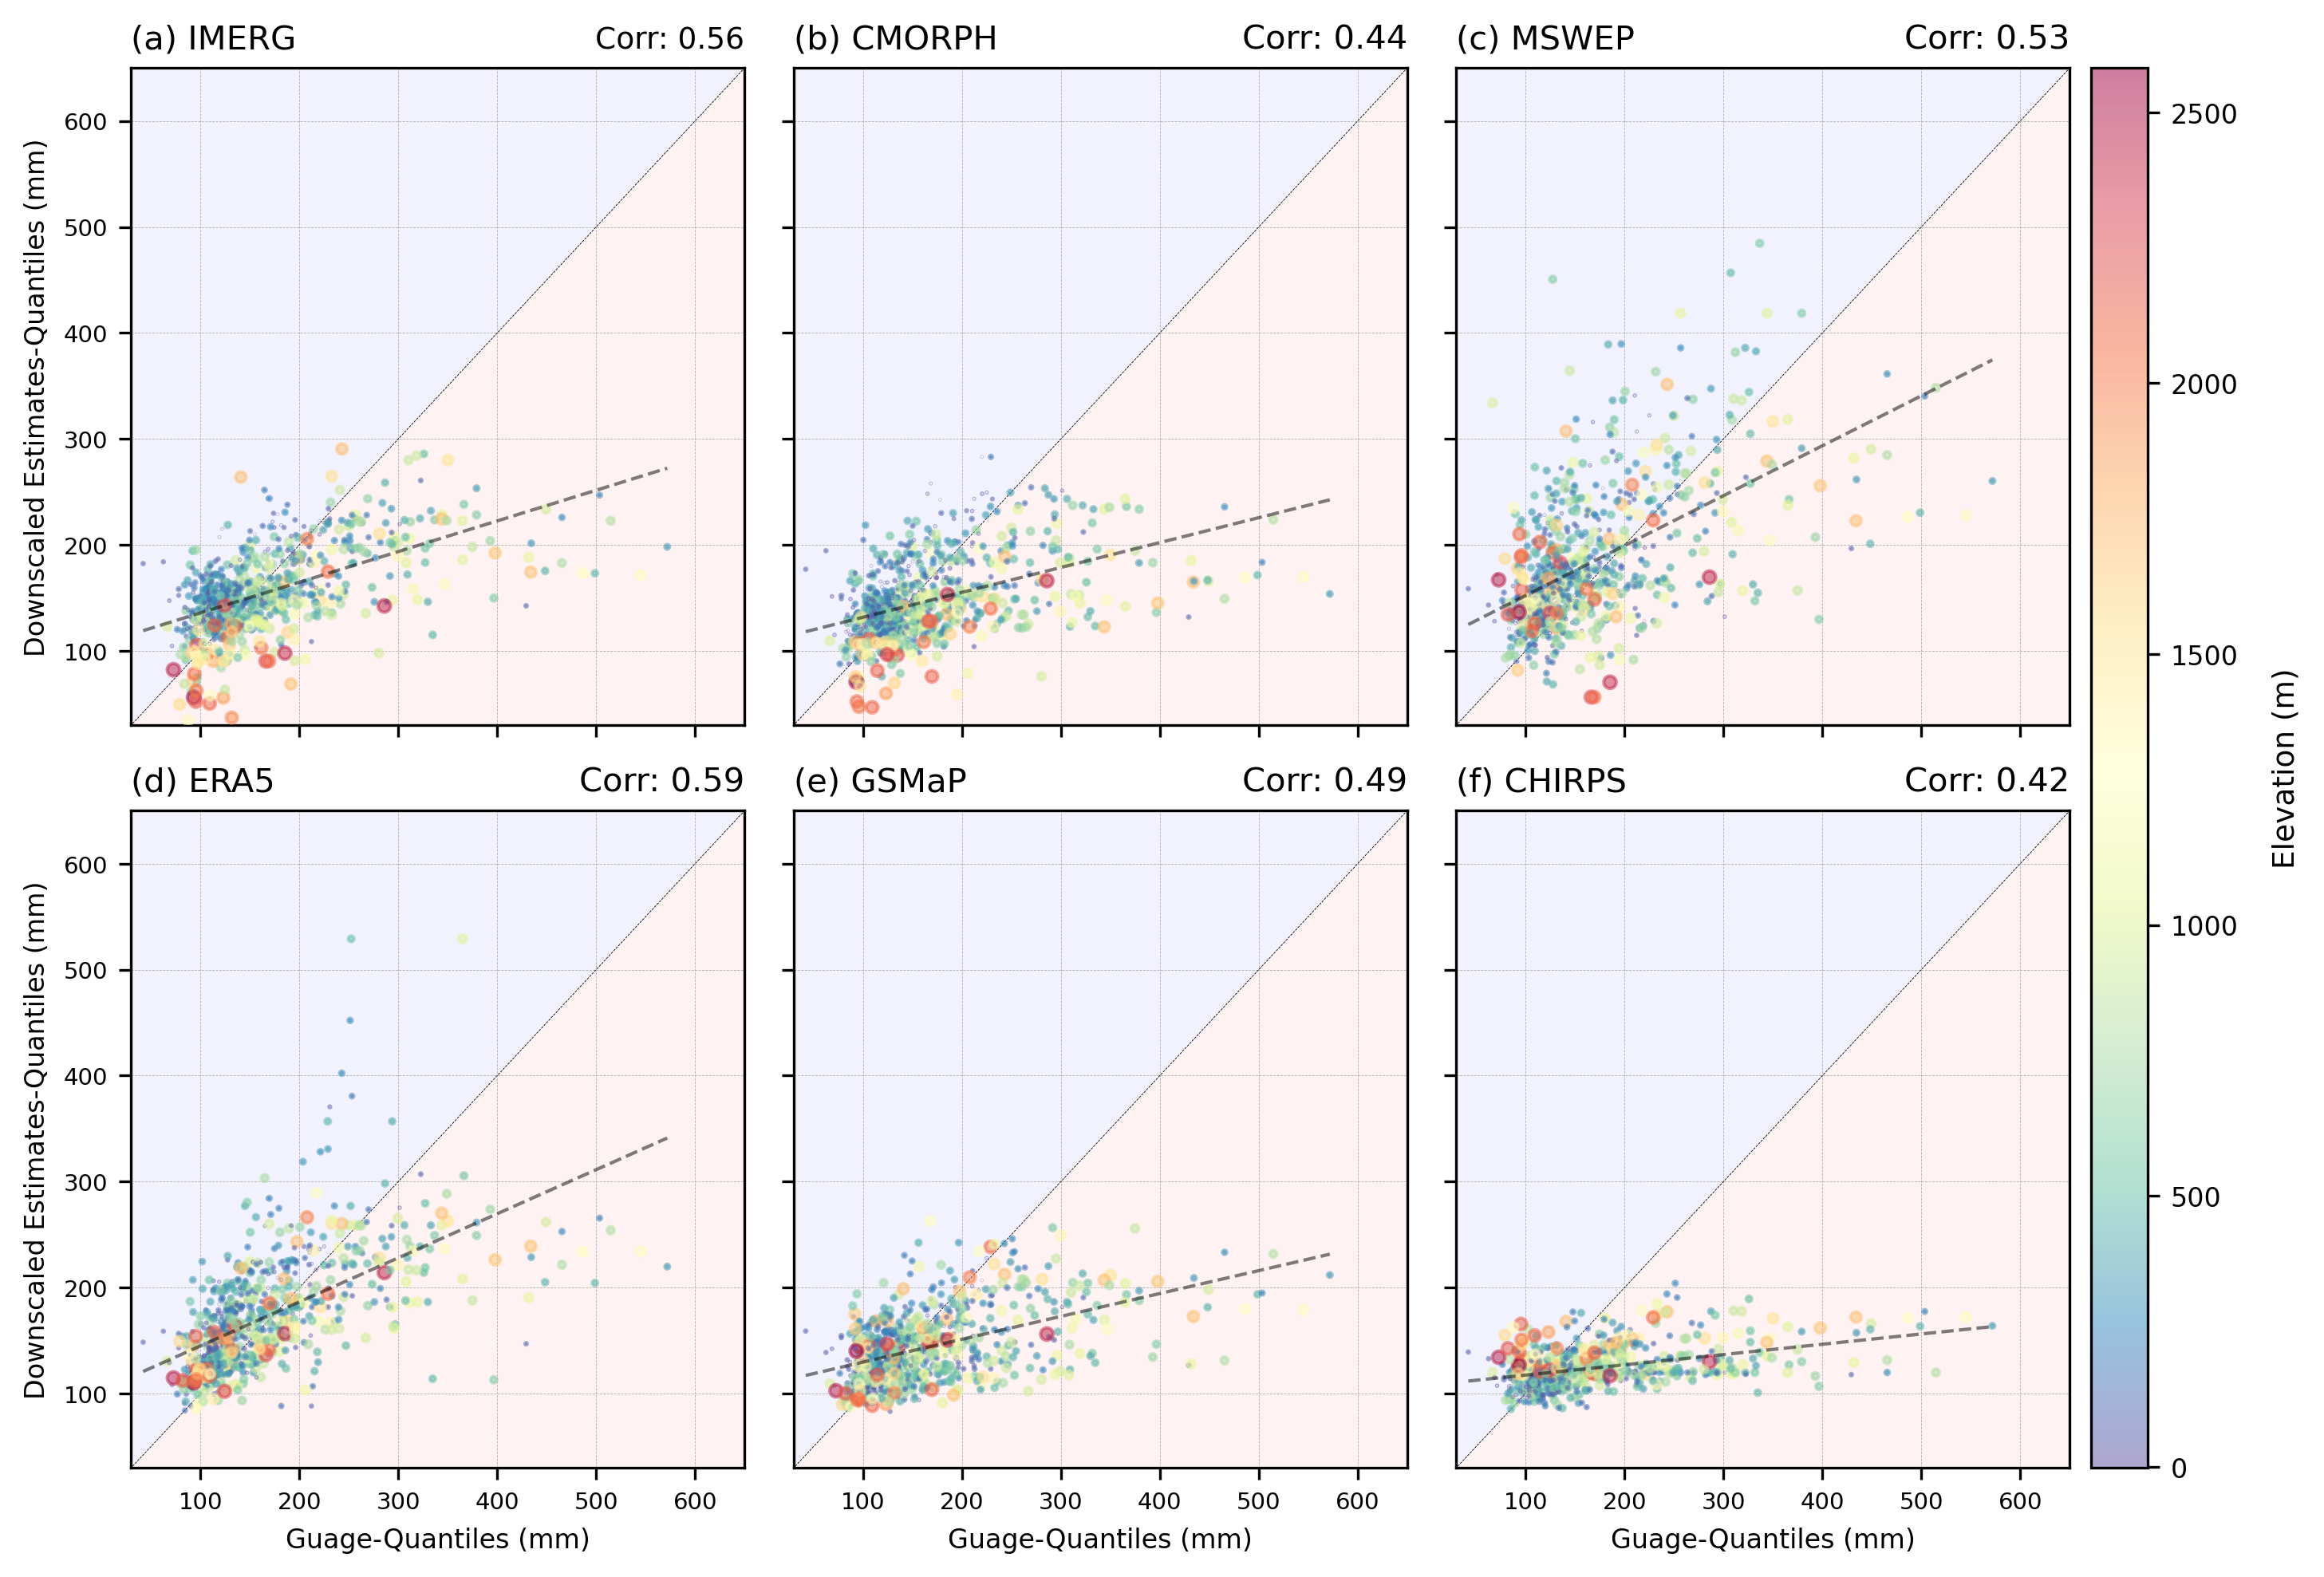

In [21]:
title_fontsize = 10

val_max = 600
vmin = DF_IMERG.ELEV.min()
vmax = DF_IMERG.ELEV.max()

fig = plt.figure(figsize=(9,6.5),dpi=300)
gs = gridspec.GridSpec(2, 3)

# ==========================================================================================================
axes = {}
pos = 0
for nrow in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nrow, ncol])
        ax.grid(linewidth=0.3, linestyle='--')
        ax.set_xlim(30,val_max+50)
        ax.set_ylim(30,val_max+50)
        ax.grid(linestyle='--', linewidth=0.2)
        ax.tick_params(axis='both', which='major', labelsize=7)
        
        ax.plot(np.arange(val_max+50),np.arange(val_max+50),'--k', linewidth=0.2, label='Identity line')
        ax.scatter([],[], s=5, c='darkred', label='Ensemble Satellite')
        ax.scatter([],[], s=5, c='darkblue', label='Ensemble Downscaled')

        if ncol > 0:
            ax.set_yticklabels([])
        if nrow == 0:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel('Guage-Quantiles (mm)',fontsize=8)
        if ncol == 0:
            ax.set_ylabel('Downscaled Estimates-Quantiles (mm)',fontsize=8)

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        x_vals = np.linspace(min(xlim[0], ylim[0]), max(xlim[1], ylim[1]), 200)
        ax.fill_between(x_vals, ylim[0], x_vals, facecolor="red", alpha=0.05, zorder=0)
        ax.fill_between(x_vals, x_vals, ylim[1], facecolor="blue", alpha=0.05, zorder=0)

        axes[(nrow, ncol)] = ax

# ==========================================================================================================
a1 = axes[(0, 0)].scatter(
    DF_IMERG.OBS, DF_IMERG.DOWN,
    alpha=0.5,
    s=DF_IMERG.ELEVn*15,
    c=DF_IMERG.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(0, 0)].plot(IMERG_x, IMERG_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(0, 0)].set_title('(a) IMERG', loc='left', fontsize=10)
axes[(0, 0)].set_title(f'Corr: {corr_IMERG}', loc='right', fontsize=9)

# ==========================================================================================================
a2 = axes[(0, 1)].scatter(
    DF_CMORPH.OBS, DF_CMORPH.DOWN,
    alpha=0.5,
    s=DF_CMORPH.ELEVn*15,
    c=DF_CMORPH.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(0, 1)].plot(CMORPH_x, CMORPH_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(0, 1)].set_title('(b) CMORPH', loc='left', fontsize=title_fontsize)
axes[(0, 1)].set_title(f'Corr: {corr_CMORPH}', loc='right', fontsize=title_fontsize)

# ==========================================================================================================
a2 = axes[(0, 2)].scatter(
    DF_MSWEP.OBS, DF_MSWEP.DOWN,
    alpha=0.5,
    s=DF_MSWEP.ELEVn*15,
    c=DF_MSWEP.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(0, 2)].plot(MSWEP_x, MSWEP_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(0, 2)].set_title('(c) MSWEP', loc='left', fontsize=title_fontsize)
axes[(0, 2)].set_title(f'Corr: {corr_MSWEP}', loc='right', fontsize=title_fontsize)

# ==========================================================================================================
a2 = axes[(1, 0)].scatter(
    DF_ERA5.OBS, DF_ERA5.DOWN,
    alpha=0.5,
    s=DF_ERA5.ELEVn*15,
    c=DF_ERA5.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(1, 0)].plot(ERA5_x, ERA5_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(1, 0)].set_title('(d) ERA5', loc='left', fontsize=title_fontsize)
axes[(1, 0)].set_title(f'Corr: {corr_ERA5}', loc='right', fontsize=title_fontsize)

# ==========================================================================================================
a2 = axes[(1, 1)].scatter(
    DF_GSMaP.OBS, DF_GSMaP.DOWN,
    alpha=0.5,
    s=DF_GSMaP.ELEVn*15,
    c=DF_GSMaP.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(1, 1)].plot(GSMaP_x, GSMaP_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(1, 1)].set_title('(e) GSMaP', loc='left', fontsize=title_fontsize)
axes[(1, 1)].set_title(f'Corr: {corr_GSMaP}', loc='right', fontsize=title_fontsize)

# ==========================================================================================================
a2 = axes[(1, 2)].scatter(
    DF_CHIRPS.OBS, DF_CHIRPS.DOWN,
    alpha=0.5,
    s=DF_CHIRPS.ELEVn*15,
    c=DF_CHIRPS.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(1, 2)].plot(CHIRPS_x, CHIRPS_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(1, 2)].set_title('(f) CHIRPS', loc='left', fontsize=title_fontsize)
axes[(1, 2)].set_title(f'Corr: {corr_CHIRPS}', loc='right', fontsize=title_fontsize)

# ==========================================================================================================
# ==========================================================================================================
cbar_ax = fig.add_axes([0.96, 0.05, 0.026, 0.9])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=8)
cbar.set_label("Elevation (m)", fontsize=9, labelpad=10) 

# ==========================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.13)

salida = '../figures/Article_down/Scatter_ALL_corrected.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Spatial Analysis

In [24]:
DF_LIST = [DF_IMERG, DF_CMORPH, DF_MSWEP, DF_ERA5, DF_GSMaP, DF_CHIRPS]
names_list = ['IMERG', 'CMORPH', 'MSWEP', 'ERA5', 'GSMaP', 'CHIRPS']
letters_list = ['(a)','(b)','(c)','(d)','(e)','(f)']

In [25]:
levels = np.arange(-1,1.1,0.1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
scatter_cmap = 'coolwarm_r'

../figures/Article_down/RE_SPATIAL_ALL_corrected.png


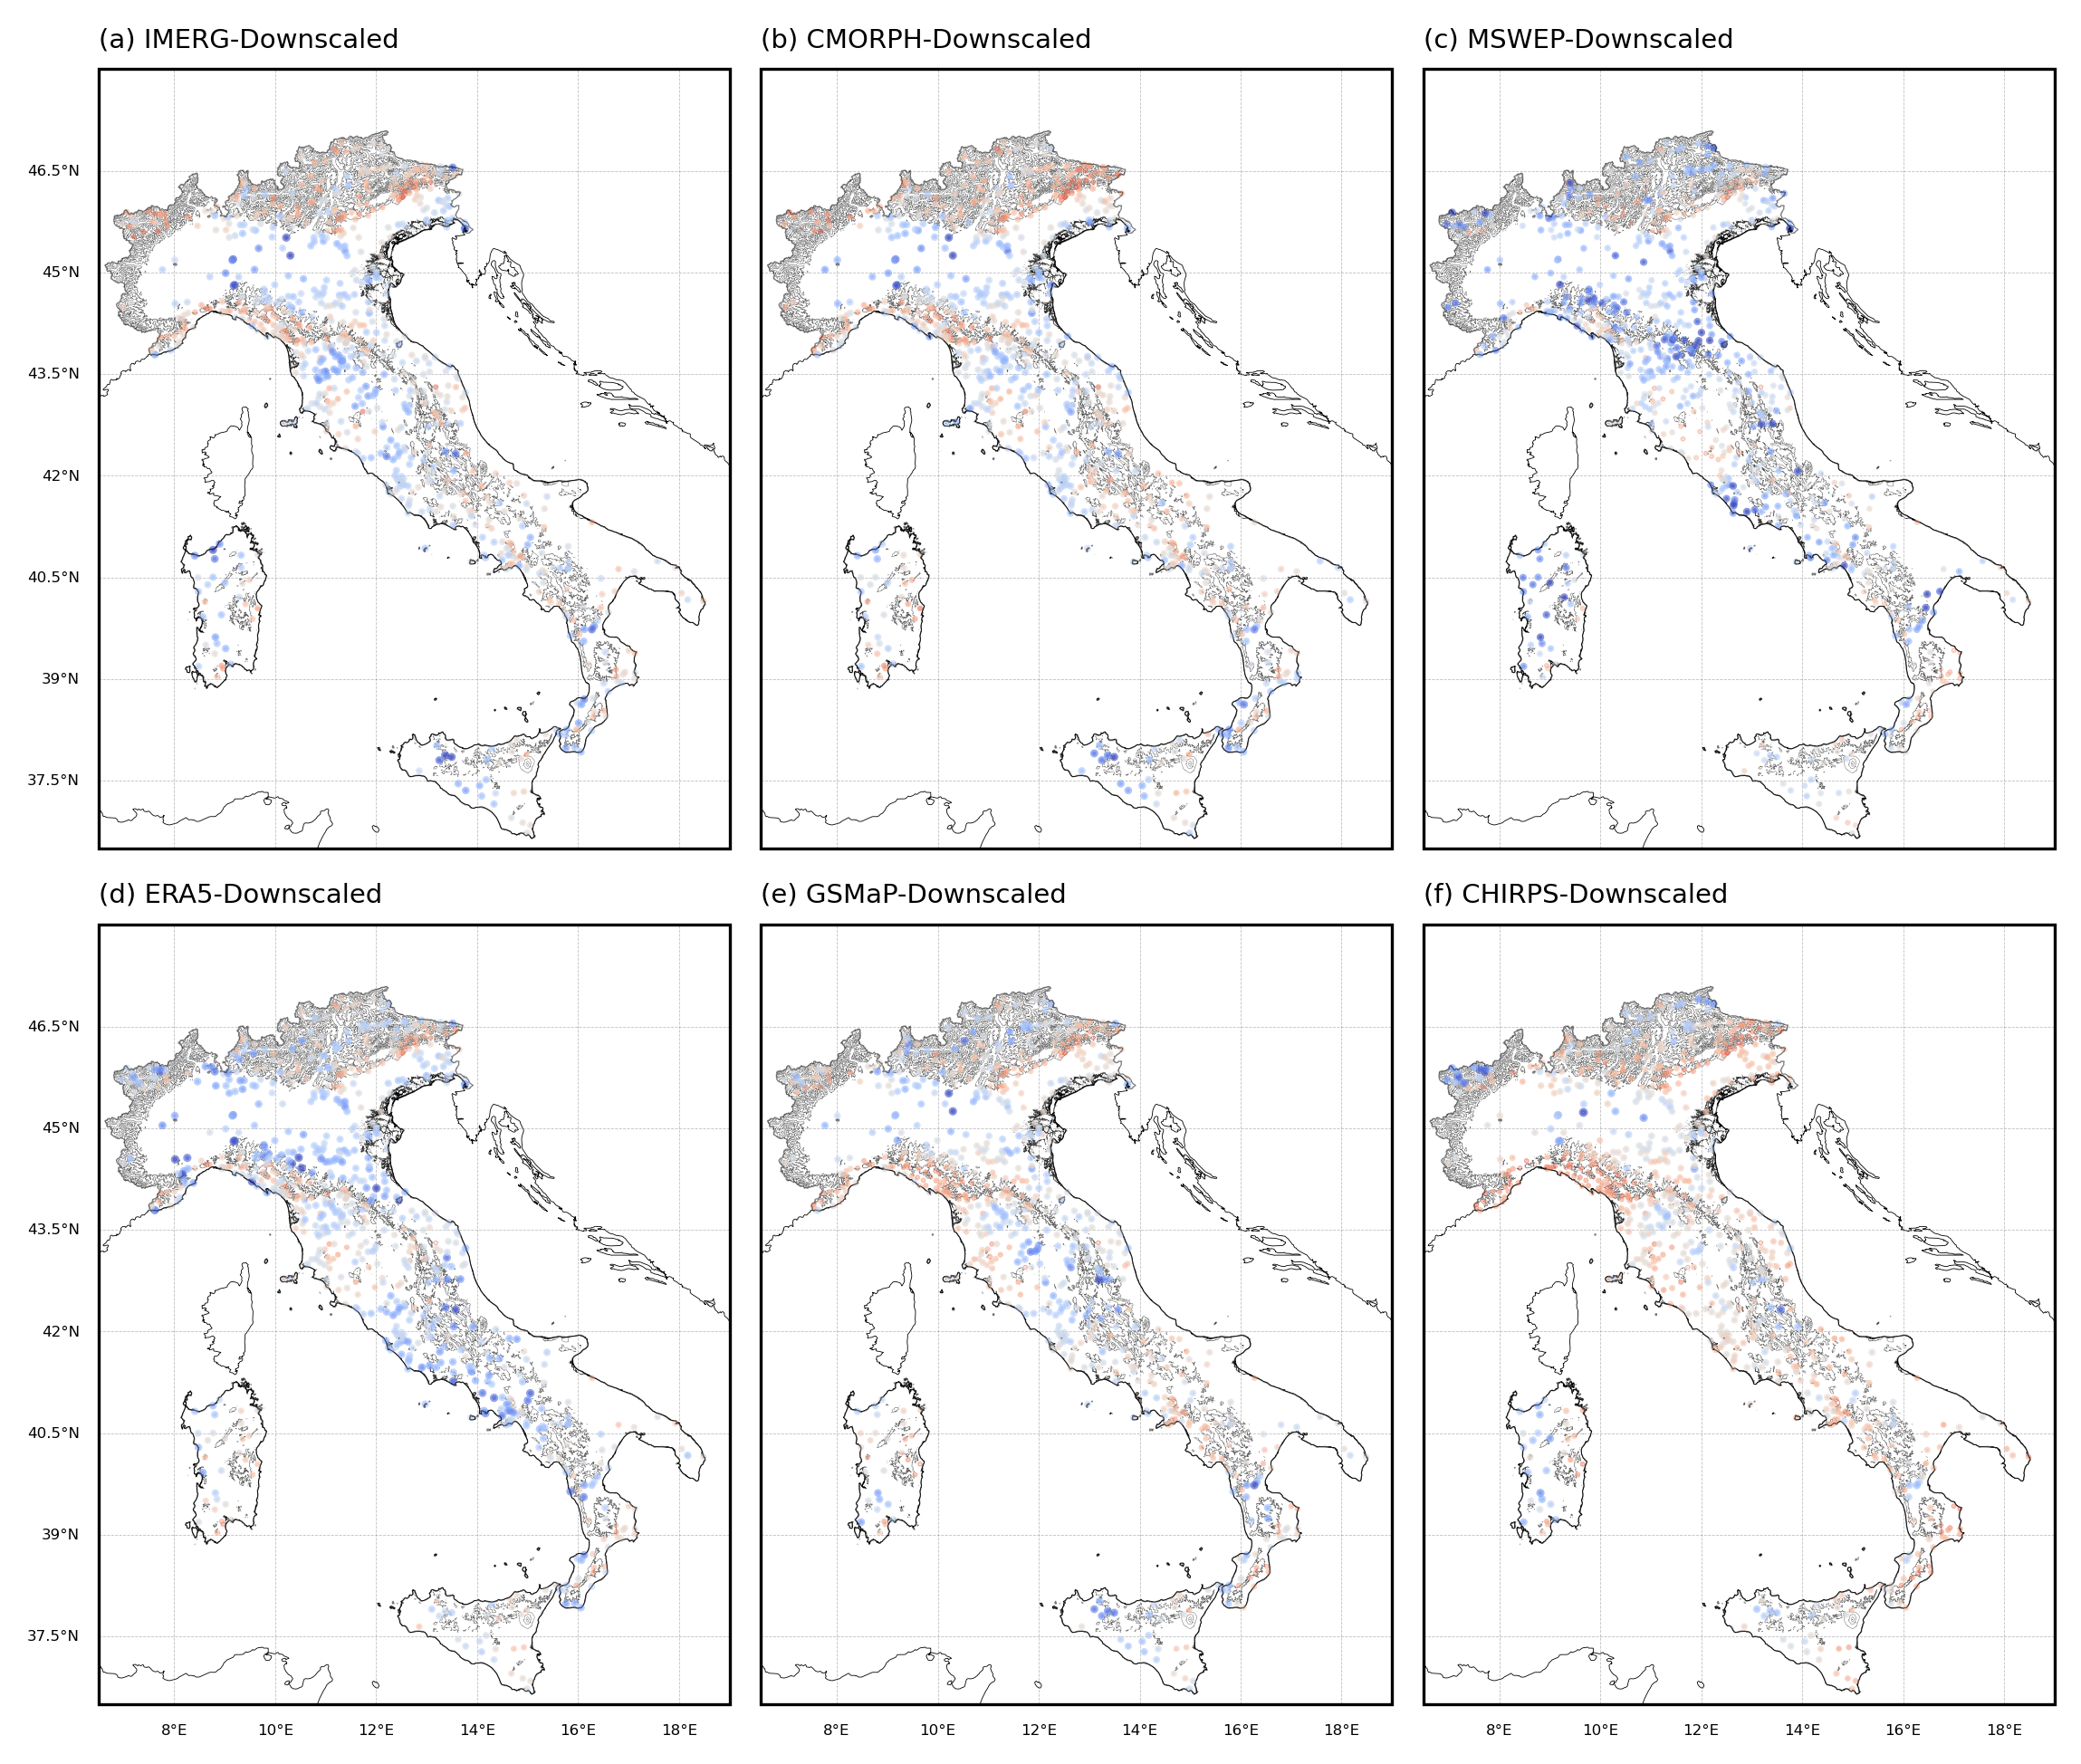

In [26]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8, 7), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        DEM.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.1, zorder=15, alpha=0.6)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

for ax, DF, name, letter in zip(axes, DF_LIST, names_list, letters_list):
    mask = (
    DF['RED'].notna() &
    DF['REDn'].notna() &
    DF['LON'].notna() &
    DF['LAT'].notna()
    )

    ax.scatter(
    DF.loc[mask, 'LON'],
    DF.loc[mask, 'LAT'],
    c=DF.loc[mask, 'RED'],
    cmap=scatter_cmap,
    s=np.array(DF.loc[mask, 'REDn']) * 3,
    alpha=0.6,
    norm=norm,
    zorder=20
    )

    gl = ax.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
    gl.top_labels = False
    if letter == '(a)' or letter == '(b)' or letter == '(c)':
        gl.bottom_labels = False
    else:
        gl.bottom_labels = True
    if letter == '(b)' or letter == '(c)' or letter == '(e)' or letter == '(f)':
        gl.left_labels = False
    else:
        gl.left_labels = True
    gl.right_labels = False
    gl.xlabel_style = {'size': 4, 'color': 'k'}
    gl.ylabel_style = {'size': 4, 'color': 'k'}

    ax.set_title(f'{letter} {name}-Downscaled', fontsize=7, loc='left')

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)

salida = '../figures/Article_down/RE_SPATIAL_ALL_corrected.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

../figures/Article_down/Scatter_FOCUS_corrected.png


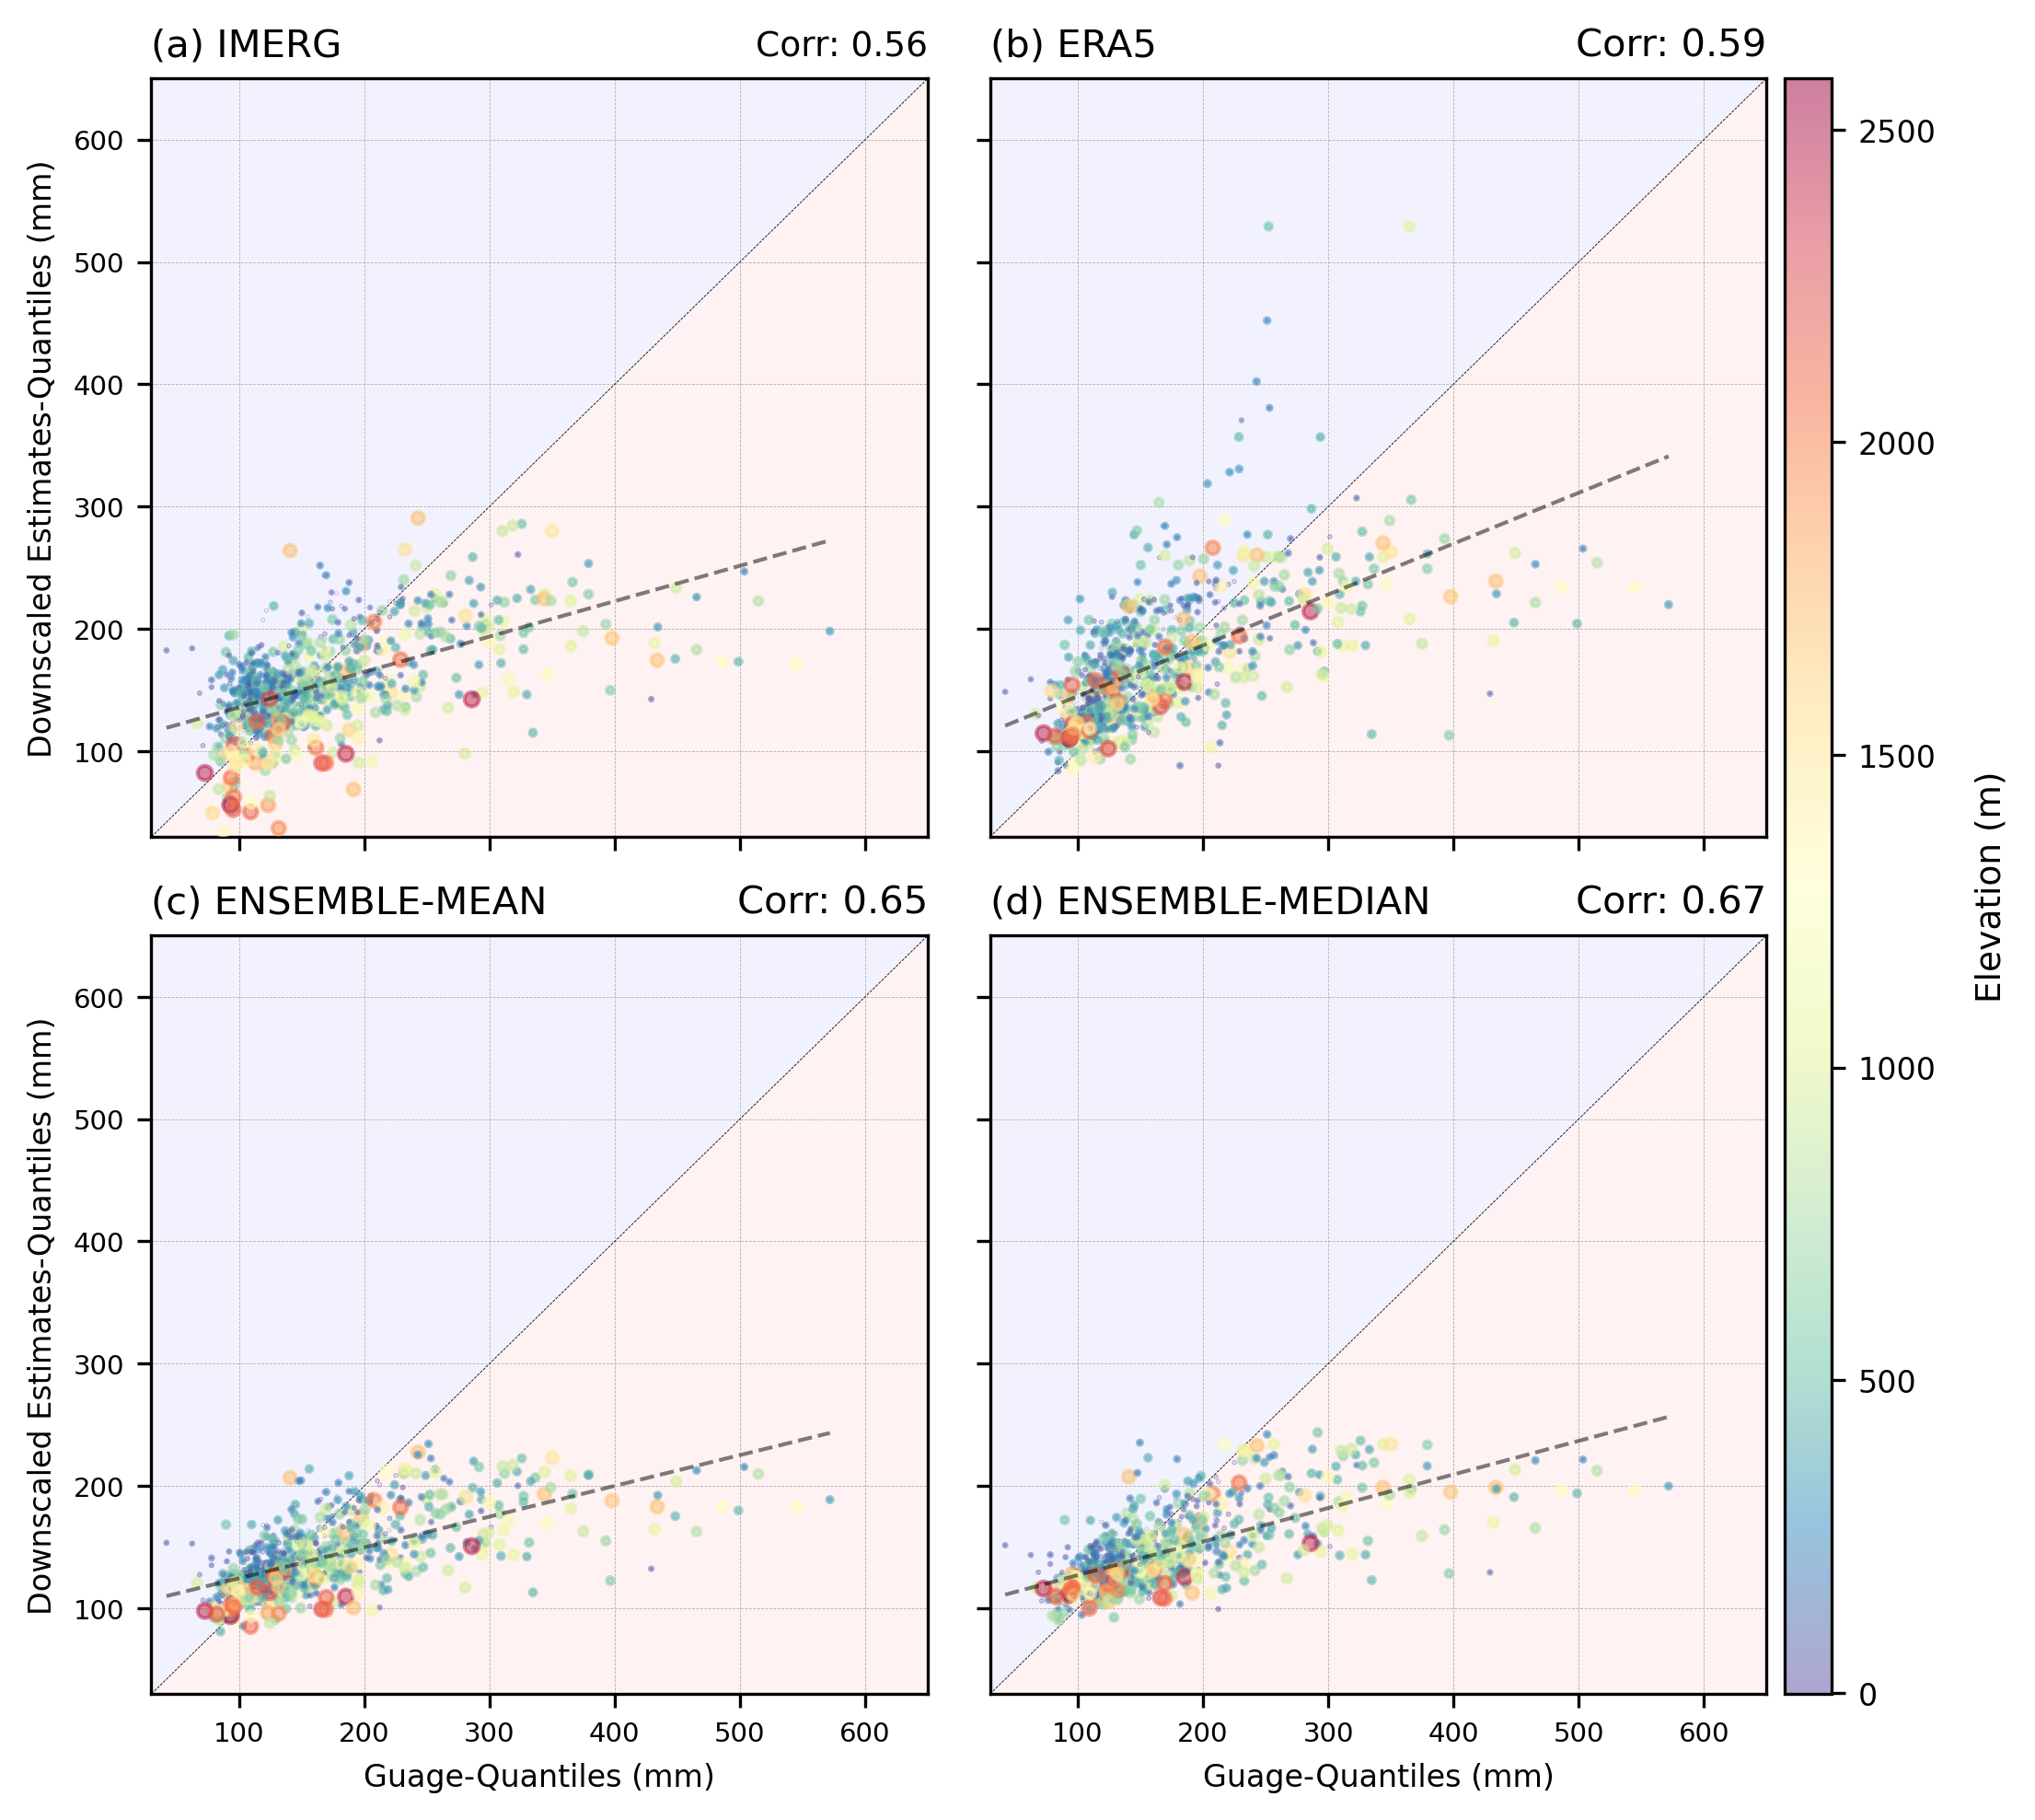

In [27]:
title_fontsize = 10

val_max = 600
vmin = DF_IMERG.ELEV.min()
vmax = DF_IMERG.ELEV.max()

fig = plt.figure(figsize=(6.5,6.5),dpi=300)
gs = gridspec.GridSpec(2, 2)

# ==========================================================================================================
axes = {}
pos = 0
for nrow in range(2):
    for ncol in range(2):
        ax = fig.add_subplot(gs[nrow, ncol])
        ax.grid(linewidth=0.3, linestyle='--')
        ax.set_xlim(30,val_max+50)
        ax.set_ylim(30,val_max+50)
        ax.grid(linestyle='--', linewidth=0.2)
        ax.tick_params(axis='both', which='major', labelsize=7)
        
        ax.plot(np.arange(val_max+50),np.arange(val_max+50),'--k', linewidth=0.2, label='Identity line')
        ax.scatter([],[], s=5, c='darkred', label='Ensemble Satellite')
        ax.scatter([],[], s=5, c='darkblue', label='Ensemble Downscaled')

        if ncol > 0:
            ax.set_yticklabels([])
        if nrow == 0:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel('Guage-Quantiles (mm)',fontsize=8)
        if ncol == 0:
            ax.set_ylabel('Downscaled Estimates-Quantiles (mm)',fontsize=8)

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        x_vals = np.linspace(min(xlim[0], ylim[0]), max(xlim[1], ylim[1]), 200)
        ax.fill_between(x_vals, ylim[0], x_vals, facecolor="red", alpha=0.05, zorder=0)
        ax.fill_between(x_vals, x_vals, ylim[1], facecolor="blue", alpha=0.05, zorder=0)

        axes[(nrow, ncol)] = ax

# ==========================================================================================================
a1 = axes[(0, 0)].scatter(
    DF_IMERG.OBS, DF_IMERG.DOWN,
    alpha=0.5,
    s=DF_IMERG.ELEVn*15,
    c=DF_IMERG.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(0, 0)].plot(IMERG_x, IMERG_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(0, 0)].set_title('(a) IMERG', loc='left', fontsize=10)
axes[(0, 0)].set_title(f'Corr: {corr_IMERG}', loc='right', fontsize=9)

# ==========================================================================================================
a2 = axes[(0, 1)].scatter(
    DF_ERA5.OBS, DF_ERA5.DOWN,
    alpha=0.5,
    s=DF_ERA5.ELEVn*15,
    c=DF_ERA5.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(0, 1)].plot(ERA5_x, ERA5_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(0, 1)].set_title('(b) ERA5', loc='left', fontsize=title_fontsize)
axes[(0, 1)].set_title(f'Corr: {corr_ERA5}', loc='right', fontsize=title_fontsize)

# ==========================================================================================================
a2 = axes[(1, 0)].scatter(
    DF_ENSEMBLE_MEAN.OBS, DF_ENSEMBLE_MEAN.DOWN,
    alpha=0.5,
    s=DF_ENSEMBLE_MEAN.ELEVn*15,
    c=DF_ENSEMBLE_MEAN.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(1, 0)].plot(ENSEMBLE_MEAN_x, ENSEMBLE_MEAN_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(1, 0)].set_title('(c) ENSEMBLE-MEAN', loc='left', fontsize=title_fontsize)
axes[(1, 0)].set_title(f'Corr: {corr_ENSEMBLE_MEAN}', loc='right', fontsize=title_fontsize)

# ==========================================================================================================
a2 = axes[(1, 1)].scatter(
    DF_ENSEMBLE_MEDIAN.OBS, DF_ENSEMBLE_MEDIAN.DOWN,
    alpha=0.5,
    s=DF_ENSEMBLE_MEDIAN.ELEVn*15,
    c=DF_ENSEMBLE_MEDIAN.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(1, 1)].plot(ENSEMBLE_MEDIAN_x, ENSEMBLE_MEDIAN_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(1, 1)].set_title('(d) ENSEMBLE-MEDIAN', loc='left', fontsize=title_fontsize)
axes[(1, 1)].set_title(f'Corr: {corr_ENSEMBLE_MEDIAN}', loc='right', fontsize=title_fontsize)

# ==========================================================================================================
# ==========================================================================================================
cbar_ax = fig.add_axes([0.96, 0.05, 0.026, 0.9])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=8)
cbar.set_label("Elevation (m)", fontsize=9, labelpad=10) 

# ==========================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.13)

salida = '../figures/Article_down/Scatter_FOCUS_corrected.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)